# CAO Points Analysis

In [1]:
# Regular expressions
import re

# Package for making HTTP requests
import requests as rq

# Dates and times
import datetime as dt

# Data Frames
import pandas as pd

# For downloading
import urllib.request as urlrq

#Plotting
import matplotlib.pyplot as plt

## 2021 Points

https://www.cao.ie/index.php?page=points&p=2021

In [2]:
#Fetch the CAO points URL
resp = rq.get('http://www2.cao.ie/points/l8.php')
# Have a look
resp

<Response [200]>

<br>

## Save original data set

In [3]:
#Get the current date and time.
now = dt.datetime.now()

# Format as a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

In [4]:
#Create a file path for the original data
pathhtml = 'data/cao2021_' + nowstr + '.html'

<br>

## Charset error on server


Technically, server states decoding as:
    ```Content-Type: text/html; charset=iso-8859-1
    ```
However, one line uses \x96 which isn't defined in iso-8859-1.
Therefore, we use the similar decoding standard cp1252, which 
is very similar but includes \x96.

In [5]:
#The server uses the wrong encoding, fix it.
original_encoding = resp.encoding
#Change to cp1252
resp.encoding = 'cp1252'

In [6]:
#Save the original html file.
with open(pathhtml, 'w') as f:
    f.write(resp.text)

In [7]:
#Compile the regular expression for matching lines.
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')
#   ([0-9]{3})(\*?) *

<br>

### Loop through the lines of the response
-------

In [8]:
# def points_to_array(s):
#     portfolio = ''
#     if s[0] == '#':
#         portfolio = '#'
#     random = ''
#     if s[-1] == '*':
#         random = '*'
#     points = ''
#     for i in s:
#         if i.isdigit():
#             points = points + i
#     return [points, portfolio, random]

In [9]:
# The file path for the csv file.
path2021 = 'data/cao2021_csv_' + nowstr + '.csv'
    
#Loop throught the lines of the response content.
no_lines = 0

#Open the csv file for writing.
with open(path2021, 'w') as f:
    # Write a header row
    f.write(','.join(['code', 'title','pointsR1','pointsR2']) + '\n')
    # Loop through lines of the response
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding!
        dline = line.decode('cp1252')
        # Match only the lines we want - the ones representing courses.
        if re_course.fullmatch(dline):
            #Add one to the lines counter
            no_lines = no_lines +1          
            # The course code
            course_code = dline[:5]
            # The course title
            course_title = dline[7:57].strip()
            # Round one points.
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
             # Join the fields using a comma.
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            # Rejoin the substrings with commas in between
            f.write(','.join(linesplit)+ '\n')           


# Print the total number of processed lines.            
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


In [10]:
# url2021 = 'http://www2.cao.ie/points/CAOPointsCharts2021.xlsx'

In [11]:
# # Create a file path for the original data
# pathxlsx = 'data/cao2021_' + nowstr + '.xlsx'

In [12]:
# #Save original file to disk
# urlrq.urlretrieve(url2021, pathxlsx)

In [13]:
# # Download and parse the excel spredsheet
# df2021 = pd.read_excel(url2021, skiprows = 11)
# # Only include level 8 data 
# df2021 = df2021[df2021['Course Level'] == 8]

In [14]:
# # Create a file path for the pandas data
# path2021 = 'data/cao2021_' + nowstr + '.csv'

In [15]:
# # Save pandas data frame to disk
# df2021.to_csv(path2021, encoding='utf-8')

In [16]:
df2021 = pd.read_csv(path2021, encoding='cp1252')

In [17]:
df2021.iloc[1]

code                                                    AL802
title       Software Design in Artificial Intelligence for...
pointsR1                                                  313
pointsR2                                                  NaN
Name: 1, dtype: object

If there is anything other than a number in the R1 and R2 column re write just the number to pointsR1 and pointsR2

In [18]:
# for row in df2021:
# df2021['pointsR1'] = df2021['R1'].replace('[A-Z.#*+a-z]', '', regex = True)
# df2021['pointsR2'] = df2021['R2'].replace('[A-Z.#*+a-z]', '', regex = True)

Checks made to verify trhe adjustment

In [19]:
# pd.set_option('display.max_rows',949)

## 2020 Points
http://www.cao.ie/index.php?page=points&p=2020

<br>

#### Save original file

In [20]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

In [21]:
# Create a file path for the original data
pathxlsx = 'data/cao2020_' + nowstr + '.xlsx'

In [22]:
#Save orihinal file to disk
urlrq.urlretrieve(url2020, pathxlsx)

('data/cao2020_20211224_042131.xlsx',
 <http.client.HTTPMessage at 0x22f1e7dcf10>)

<br>

#### Load spreadsheet using pandas

In [23]:
# Download and parse the excel spredsheet
df2020 = pd.read_excel(url2020, skiprows = 10)
# Only include level 8 data
df2020 = df2020[df2020.LEVEL == 8]

Only level 8 values of 1027rows verified in original csv file

In [24]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Arts,Arts (options),WD200,AQA,NaN,AQA,NaN,AQA,NaN,336,...,avp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Spot check last row
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [26]:
# Create a file path for the pandas data
path2020 = 'data/cao2020_' + nowstr + '.csv'

In [27]:
# Save pandas data frame to disk
df2020.to_csv(path2020)

<br>

## 2019 Points
http://www.cao.ie/index.php?page=points&p=2019

##### Steps to reproduce

1. Download original pdf file
2. Open original pdf file in Microsoft Word.
3. Save Microsoft Word's converted PDF in docx format.
4. Re-save Word document for editing.
5. Delete headers and footers.
6. Delete preamble on page 1.
7. Select all and copy.
8. Paste into Notepad ++.
9. Remeove HEI name headings and paste onto each cousre line.
10. Delete blank lines.
11. Delete tab characters at end of college groups.
12. Change all backticks to apostrophes

In [28]:
df2019 = pd.read_csv('data/cao2019_20211204_155130_edited.csv', sep = '\t')

In [29]:
df2019

,HEI,Course Code,INSTITUTION and COURSE,EOS,Mid
0,Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,Athlone Institute of Technology,AL802,Software Design with Cloud Computing,301,306.0
2,Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure,329,442.0
4,Athlone Institute of Technology,AL810,Quantity Surveying,307,349.0
...,...,...,...,...,...
925,Waterford Institute of Technology,WD200,Arts (options),221,296.0
926,Waterford Institute of Technology,WD210,Software Systems Development,271,329.0
927,Waterford Institute of Technology,WD211,Creative Computing,275,322.0
928,Waterford Institute of Technology,WD212,Recreation and Sport Management,274,311.0


<br>

## Concat and Join
------------

In [30]:
courses2019 = df2019[['Course Code', 'INSTITUTION and COURSE']]
courses2019.columns = ['code', 'title']
courses2019

,code,title
0,AL801,Software Design with Virtual Reality and Gaming
1,AL802,Software Design with Cloud Computing
2,AL803,Software Design with Mobile Apps and Connected...
3,AL805,Network Management and Cloud Infrastructure
4,AL810,Quantity Surveying
...,...,...
925,WD200,Arts (options)
926,WD210,Software Systems Development
927,WD211,Creative Computing
928,WD212,Recreation and Sport Management


In [31]:
courses2020 = df2020[['COURSE CODE2', 'COURSE TITLE']]
courses2020.columns = ['code', 'title']
courses2020

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1455,WD200,Arts (options)
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [32]:
courses2021 = df2021[['code', 'title']]
courses2021

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [33]:
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2901,WD200,Arts (options)
2902,WD210,Software Systems Development
2903,WD211,Creative Computing
2904,WD212,Recreation and Sport Management


In [34]:
allcourses.sort_values('code')

,code,title
175,AC120,International Business
2144,AC120,International Business
949,AC120,International Business
176,AC137,Liberal Arts
2145,AC137,Liberal Arts
...,...,...
1975,WD230,Mechanical and Manufacturing Engineering
946,WD230,Mechanical and Manufacturing Engineering
2905,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [35]:
#Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
2901,WD200,Arts (options)
2902,WD210,Software Systems Development
2903,WD211,Creative Computing
2904,WD212,Recreation and Sport Management


In [36]:
#Returns a copy of the data frame with all duplicates removed.
allcourses.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
2844,TL801,Animation Visual Effects and Motion Design
2845,TL802,"TV, Radio and New Media"
2846,TL803,Music Technology
2849,TL812,Computing with Digital Media


In [37]:
#Finds all extra copies of duplicated rows.
allcourses[allcourses.duplicated(subset=['code'])]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
2901,WD200,Arts (options)
2902,WD210,Software Systems Development
2903,WD211,Creative Computing
2904,WD212,Recreation and Sport Management


In [38]:
#Returns a copy of the data frame with all duplicates removed - based only on code
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [39]:
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1209,SG441,Environmental Science
1210,SG446,Applied Archaeology
1211,TL803,Music Technology
1212,TL812,Computing with Digital Media


<br>

## Join to the points
--------

In [40]:
# Set the index to the code column
df2021.set_index('code', inplace=True)
df2021.columns = ['title','points_r1_2021', 'points_r2_2021']
df2021

,title,points_r1_2021,points_r2_2021
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [41]:
# Set the index to the code column
allcourses.set_index('code', inplace=True)

In [42]:
allcourses = allcourses.join(df2021[['points_r1_2021']])
allcourses

,title,points_r1_2021
code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
SG441,Environmental Science,NaN
SG446,Applied Archaeology,NaN
TL803,Music Technology,NaN


In [43]:
df2019_r1 = df2019[['Course Code', 'EOS']]
df2019_r1.columns = ['code', 'points_EOS_2019']
df2019_r1

,code,points_EOS_2019
0,AL801,304
1,AL802,301
2,AL803,309
3,AL805,329
4,AL810,307
...,...,...
925,WD200,221
926,WD210,271
927,WD211,275
928,WD212,274


In [44]:
# Set the index to the code column
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_EOS_2019
code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


In [45]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_r1_2020']
df2020_r1

,code,points_r1_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1455,WD200,AQA
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [46]:
# Set the index to the code column
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD200,AQA
WD210,279
WD211,271


In [47]:
# Join 2020 points to allcourses
allcourses = allcourses.join(df2020_r1)
allcourses

,title,points_r1_2021,points_r1_2020
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


In [48]:
# Join 2019 points to allcourses
allcourses = allcourses.join(df2019_r1)
allcourses

,title,points_r1_2021,points_r1_2020,points_EOS_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264


In [49]:
allcourses.dtypes

title              object
points_r1_2021     object
points_r1_2020     object
points_EOS_2019    object
dtype: object

In [50]:
pd.set_option('display.max_rows',10)
allcourses

,title,points_r1_2021,points_r1_2020,points_EOS_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264


In [51]:
allcourses = allcourses.join(df2021[['points_r2_2021']])
allcourses

,title,points_r1_2021,points_r1_2020,points_EOS_2019,points_r2_2021
code,,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304,NaN
AL802,Software Design in Artificial Intelligence for...,313,332,301,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,337,309,NaN
AL805,Computer Engineering for Network Infrastructure,321,333,329,NaN
AL810,Quantity Surveying,328,319,307,NaN
...,...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297,NaN
SG446,Applied Archaeology,NaN,NaN,289,NaN
TL803,Music Technology,NaN,NaN,264,NaN


In [52]:
df2020_r2 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r2.columns = ['code', 'points_r2_2020']
df2020_r2

,code,points_r2_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1455,WD200,AQA
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [53]:
allcourses = allcourses.join(df2020_r2[['points_r2_2020']])
allcourses

,title,points_r1_2021,points_r1_2020,points_EOS_2019,points_r2_2021,points_r2_2020
code,,,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304,NaN,NaN
AL802,Software Design in Artificial Intelligence for...,313,332,301,NaN,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,337,309,NaN,NaN
AL805,Computer Engineering for Network Infrastructure,321,333,329,NaN,NaN
AL810,Quantity Surveying,328,319,307,NaN,NaN
...,...,...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297,NaN,NaN
SG446,Applied Archaeology,NaN,NaN,289,NaN,NaN
TL803,Music Technology,NaN,NaN,264,NaN,NaN


In [54]:
df2019

,HEI,Course Code,INSTITUTION and COURSE,EOS,Mid
0,Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,Athlone Institute of Technology,AL802,Software Design with Cloud Computing,301,306.0
2,Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure,329,442.0
4,Athlone Institute of Technology,AL810,Quantity Surveying,307,349.0
...,...,...,...,...,...
925,Waterford Institute of Technology,WD200,Arts (options),221,296.0
926,Waterford Institute of Technology,WD210,Software Systems Development,271,329.0
927,Waterford Institute of Technology,WD211,Creative Computing,275,322.0
928,Waterford Institute of Technology,WD212,Recreation and Sport Management,274,311.0


In [55]:
df2019_r2 = df2019[['Course Code', 'Mid']]
df2019_r2.columns = ['code', 'points_Mid_2019']
df2019_r2

,code,points_Mid_2019
0,AL801,328.0
1,AL802,306.0
2,AL803,337.0
3,AL805,442.0
4,AL810,349.0
...,...,...
925,WD200,296.0
926,WD210,329.0
927,WD211,322.0
928,WD212,311.0


In [56]:
allcourses = allcourses.join(df2019_r2[['points_Mid_2019']])
allcourses

,title,points_r1_2021,points_r1_2020,points_EOS_2019,points_r2_2021,points_r2_2020,points_Mid_2019
code,,,,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304,NaN,NaN,NaN
AL802,Software Design in Artificial Intelligence for...,313,332,301,NaN,NaN,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,337,309,NaN,NaN,NaN
AL805,Computer Engineering for Network Infrastructure,321,333,329,NaN,NaN,NaN
AL810,Quantity Surveying,328,319,307,NaN,NaN,NaN
...,...,...,...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297,NaN,NaN,NaN
SG446,Applied Archaeology,NaN,NaN,289,NaN,NaN,NaN
TL803,Music Technology,NaN,NaN,264,NaN,NaN,NaN


In [57]:
allcourses2 = allcourses[['points_r1_2021','points_r1_2020','points_EOS_2019','points_r2_2021','points_r2_2020','points_Mid_2019']].replace('[A-Z.#*+a-z]', '', regex = True)

# df2021['pointsR1'] = df2021['R1'].replace('[A-Z.#*+a-z]', '', regex = True)
# df2021['pointsR2'] = df2021['R2'].replace('[A-Z.#*+a-z]', '', regex = True)

In [58]:
pd.set_option('display.max_rows',12)
allcourses2

,points_r1_2021,points_r1_2020,points_EOS_2019,points_r2_2021,points_r2_2020,points_Mid_2019
code,,,,,,
AL801,300,303,304,NaN,NaN,NaN
AL802,313,332,301,NaN,NaN,NaN
AL803,350,337,309,NaN,NaN,NaN
AL805,321,333,329,NaN,NaN,NaN
AL810,328,319,307,NaN,NaN,NaN
...,...,...,...,...,...,...
SG441,NaN,NaN,297,NaN,NaN,NaN
SG446,NaN,NaN,289,NaN,NaN,NaN
TL803,NaN,NaN,264,NaN,NaN,NaN


In [59]:
allcourses2 = allcourses2.join(allcourses[['title']])
allcourses2

,points_r1_2021,points_r1_2020,points_EOS_2019,points_r2_2021,points_r2_2020,points_Mid_2019,title
code,,,,,,,
AL801,300,303,304,NaN,NaN,NaN,Software Design for Virtual Reality and Gaming
AL802,313,332,301,NaN,NaN,NaN,Software Design in Artificial Intelligence for...
AL803,350,337,309,NaN,NaN,NaN,Software Design for Mobile Apps and Connected ...
AL805,321,333,329,NaN,NaN,NaN,Computer Engineering for Network Infrastructure
AL810,328,319,307,NaN,NaN,NaN,Quantity Surveying
...,...,...,...,...,...,...,...
SG441,NaN,NaN,297,NaN,NaN,NaN,Environmental Science
SG446,NaN,NaN,289,NaN,NaN,NaN,Applied Archaeology
TL803,NaN,NaN,264,NaN,NaN,NaN,Music Technology


In [60]:
allcourses2.dtypes

points_r1_2021      object
points_r1_2020      object
points_EOS_2019     object
points_r2_2021      object
points_r2_2020     float64
points_Mid_2019    float64
title               object
dtype: object

In [61]:
allcourses2['points_r1_2021'] = pd.to_numeric(allcourses2['points_r1_2021'],errors = 'coerce')
allcourses2['points_r1_2020'] = pd.to_numeric(allcourses2['points_r1_2020'],errors = 'coerce')
allcourses2['points_EOS_2019'] = pd.to_numeric(allcourses2['points_EOS_2019'],errors = 'coerce')
allcourses2['points_r2_2021'] = pd.to_numeric(allcourses2['points_r2_2021'],errors = 'coerce')

In [62]:
allcourses2.dtypes

points_r1_2021     float64
points_r1_2020     float64
points_EOS_2019    float64
points_r2_2021     float64
points_r2_2020     float64
points_Mid_2019    float64
title               object
dtype: object

In [67]:
allcourses2

,points_r1_2021,points_r1_2020,points_EOS_2019,points_r2_2021,points_r2_2020,points_Mid_2019,title
code,,,,,,,
AL801,300.0,303.0,304.0,NaN,NaN,NaN,Software Design for Virtual Reality and Gaming
AL802,313.0,332.0,301.0,NaN,NaN,NaN,Software Design in Artificial Intelligence for...
AL803,350.0,337.0,309.0,NaN,NaN,NaN,Software Design for Mobile Apps and Connected ...
AL805,321.0,333.0,329.0,NaN,NaN,NaN,Computer Engineering for Network Infrastructure
AL810,328.0,319.0,307.0,NaN,NaN,NaN,Quantity Surveying
...,...,...,...,...,...,...,...
SG441,NaN,NaN,297.0,NaN,NaN,NaN,Environmental Science
SG446,NaN,NaN,289.0,NaN,NaN,NaN,Applied Archaeology
TL803,NaN,NaN,264.0,NaN,NaN,NaN,Music Technology


(array([  4.,  60., 347., 235., 172.,  52.,  12.,  10.,   8.,   6.]),
 array([ 55. , 147.4, 239.8, 332.2, 424.6, 517. , 609.4, 701.8, 794.2,
        886.6, 979. ]),
 <BarContainer object of 10 artists>)

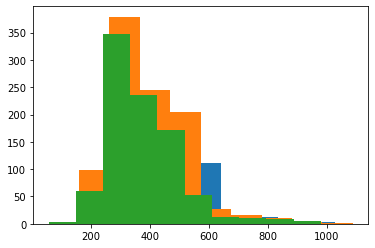

In [69]:
plt.hist(allcourses2['points_r1_2021'])
plt.hist(allcourses2['points_r1_2020'])
plt.hist(allcourses2['points_EOS_2019'])

---------
# End